In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load datasets
results_lr = pd.read_csv("models_results/Regression.csv")
results_tree = pd.read_csv("models_results/Decision_tree.csv")
results_forest = pd.read_csv("models_results/Random_forest.csv")

results_bayes_lr = pd.read_csv("models_results/bayes_results_lr.csv")
results_bayes_tree = pd.read_csv("models_results/bayes_results_tree.csv")
results_bayes_forest = pd.read_csv("models_results/bayes_results_forest.csv")

theta_lr = np.max(results_lr['mean_result'])
theta_tree = np.max(results_tree['mean_result'])
theta_forest = np.max(results_forest['mean_result'])

c:\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
# theta_* for each model
print(theta_lr)
print(theta_tree)
print(theta_forest)

0.7535938655403756
0.8160206358998854
0.8295886928064533


In [2]:
# add new column with mean score with bayes method
results_bayes_lr['mean_result'] = (results_bayes_lr['wynik_zbior_1'] + results_bayes_lr['wynik_zbior_2'] + results_bayes_lr['wynik_zbior_3'] + results_bayes_lr['wynik_zbior_4']) / 4
results_bayes_tree['mean_result'] = (results_bayes_tree['wynik_zbior_1'] + results_bayes_tree['wynik_zbior_2'] + results_bayes_tree['wynik_zbior_3'] + results_bayes_tree['wynik_zbior_4']) / 4
results_bayes_forest['mean_result'] = (results_bayes_forest['wynik_zbior_1'] + results_bayes_forest['wynik_zbior_2'] + results_bayes_forest['wynik_zbior_3'] + results_bayes_forest['wynik_zbior_4']) / 4

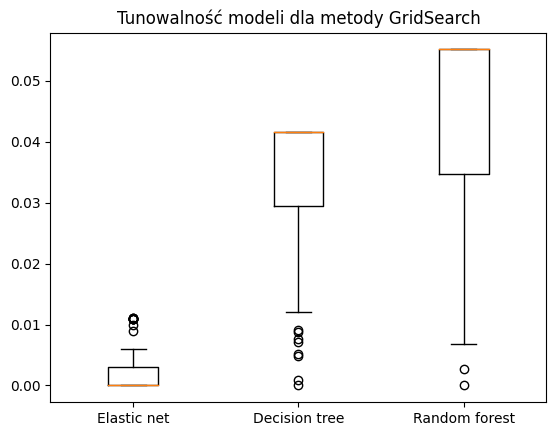

In [3]:
# boxplot dla Gridsearch
boxplot_GridS = [theta_lr - results_lr['mean_result'], theta_tree - results_tree['mean_result'], theta_forest - results_forest['mean_result']]
plt.boxplot(boxplot_GridS,labels=['Elastic net', 'Decision tree', 'Random forest'])
plt.title("Tunowalność modeli dla metody GridSearch")
plt.savefig("plots/gridsearch")

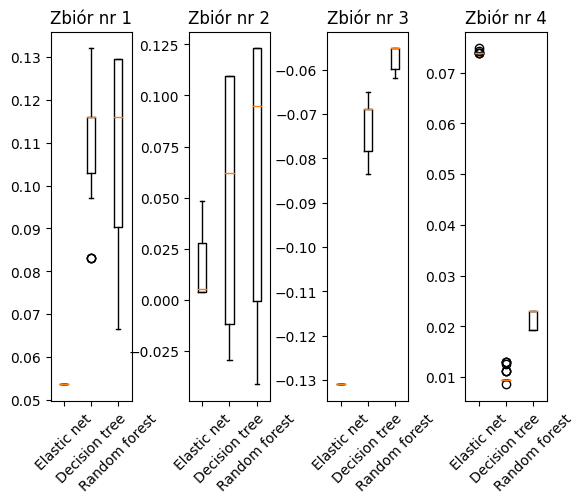

In [9]:
#Bayes for each model
boxplot_1 = [theta_lr - results_bayes_lr['wynik_zbior_1'],theta_tree - results_bayes_tree['wynik_zbior_1'],theta_forest - results_bayes_forest['wynik_zbior_1']]
boxplot_2 = [theta_lr - results_bayes_lr['wynik_zbior_2'],theta_tree - results_bayes_tree['wynik_zbior_2'],theta_forest - results_bayes_forest['wynik_zbior_2']]
boxplot_3 = [theta_lr - results_bayes_lr['wynik_zbior_3'],theta_tree - results_bayes_tree['wynik_zbior_3'],theta_forest - results_bayes_forest['wynik_zbior_3']]
boxplot_4 = [theta_lr - results_bayes_lr['wynik_zbior_4'],theta_tree - results_bayes_tree['wynik_zbior_4'],theta_forest - results_bayes_forest['wynik_zbior_4']]
name2 = [boxplot_1,boxplot_2,boxplot_3,boxplot_4]


plt.figsize=(30, 8)
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=0.7) 
    plt.subplots_adjust(wspace=0.7)
    plt.boxplot(name2[i-1],labels=['Elastic net', 'Decision tree', 'Random forest'])
    plt.title(f"Zbiór nr {i}")
plt.savefig("plots/Bayes_join_zbior", bbox_inches="tight")

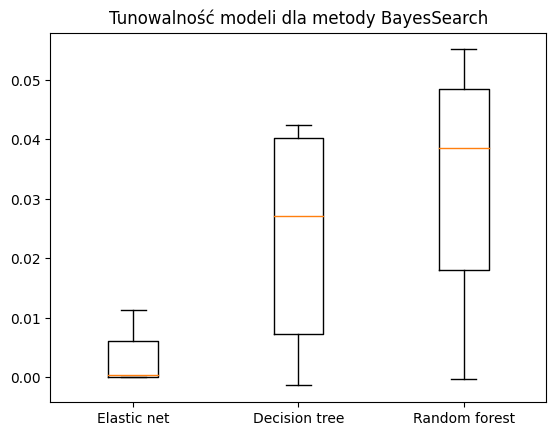

In [6]:
# Bayes for mean
Bayes_mean = [theta_lr - results_bayes_lr['mean_result'], theta_tree - results_bayes_tree['mean_result'], theta_forest - results_bayes_forest['mean_result']]
plt.boxplot(Bayes_mean, labels=['Elastic net', 'Decision tree', 'Random forest'])
plt.figsize=(10, 6)
plt.title("Tunowalność modeli dla metody BayesSearch")
plt.savefig("plots/Bayes_mean")

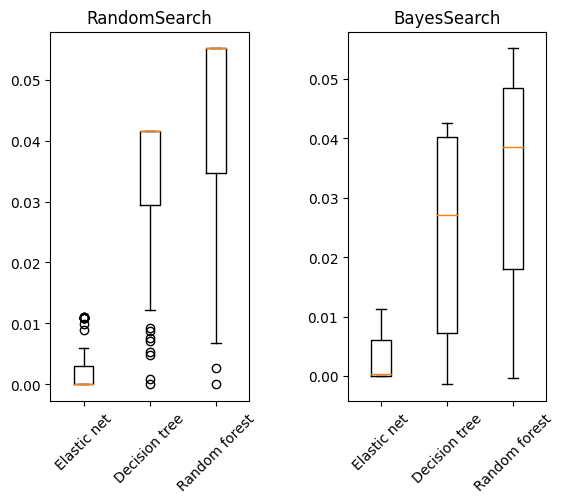

In [8]:
# 2 boxplty na jednym
boxplot_GridS = [theta_lr - results_lr['mean_result'], theta_tree - results_tree['mean_result'], theta_forest - results_forest['mean_result']]


Bayes_mean = [theta_lr - results_bayes_lr['mean_result'], theta_tree - results_bayes_tree['mean_result'], theta_forest - results_bayes_forest['mean_result']]

name = [boxplot_GridS, Bayes_mean]
nazwy = ["RandomSearch", "BayesSearch"]
for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.xticks(rotation=45)
    plt.subplots_adjust(wspace=0.5)
    plt.boxplot(name[i-1],labels=['Elastic net', 'Decision tree', 'Random forest'])
    plt.title(nazwy[i-1])
plt.savefig("plots/join_tunowalnosc", bbox_inches="tight")

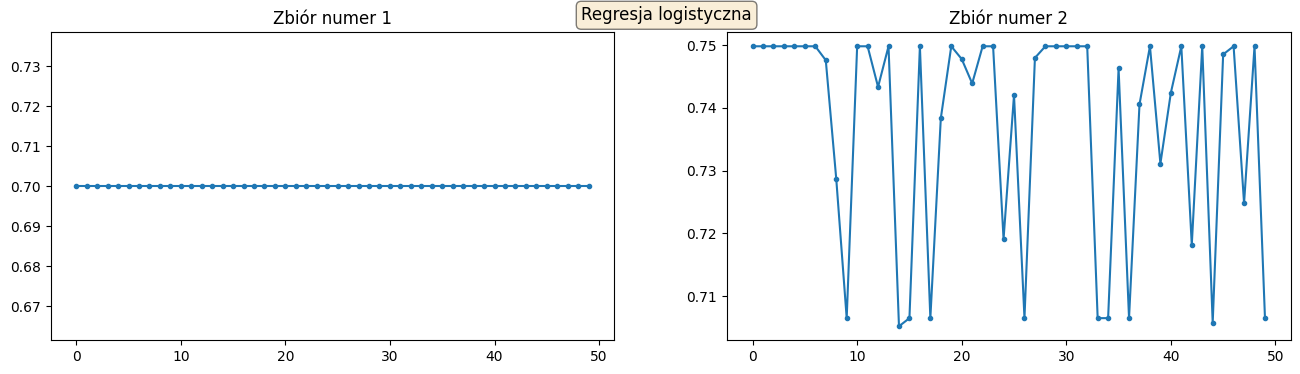

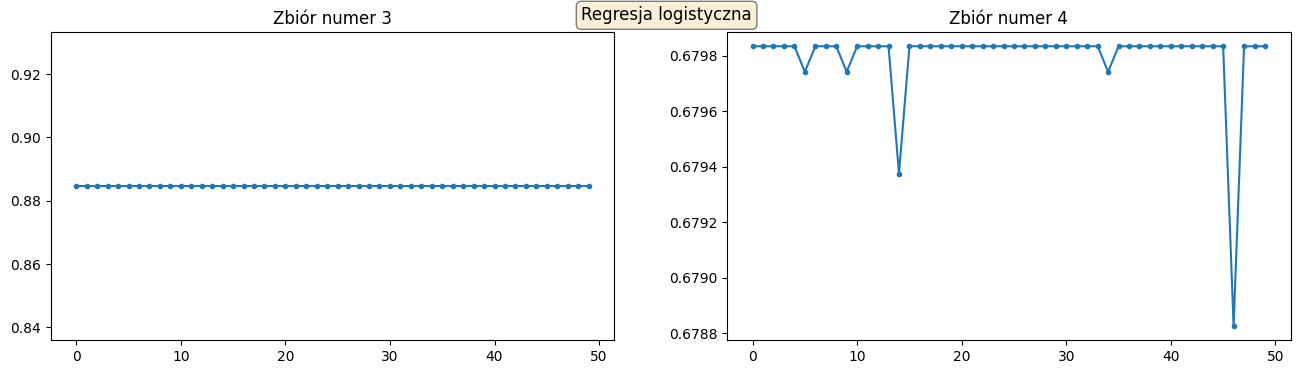

In [ ]:
plt.figure(figsize=(16, 4))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.suptitle("Regresja logistyczna", bbox=props, verticalalignment='top', x=0.51, y=0.945)

plt.subplot(1, 2, 1)
results_bayes_lr[f'wynik_zbior_{1}'].plot(title=f'Zbiór numer {1}', style='.-')
plt.subplot(1, 2, 2)
results_bayes_lr[f'wynik_zbior_{2}'].plot(title=f'Zbiór numer {2}', style='.-')
plt.savefig('plots/convergance_lr_1_2', bbox_inches="tight",)
plt.show()

plt.figure(figsize=(16, 4))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.suptitle("Regresja logistyczna", bbox=props, verticalalignment='top', x=0.51, y=0.945)

plt.subplot(1, 2, 1)
results_bayes_lr[f'wynik_zbior_{3}'].plot(title=f'Zbiór numer {3}', style='.-')
plt.subplot(1, 2, 2)
results_bayes_lr[f'wynik_zbior_{4}'].plot(title=f'Zbiór numer {4}', style='.-')

plt.savefig('plots/convergance_lr_3_4', bbox_inches="tight")
plt.show()

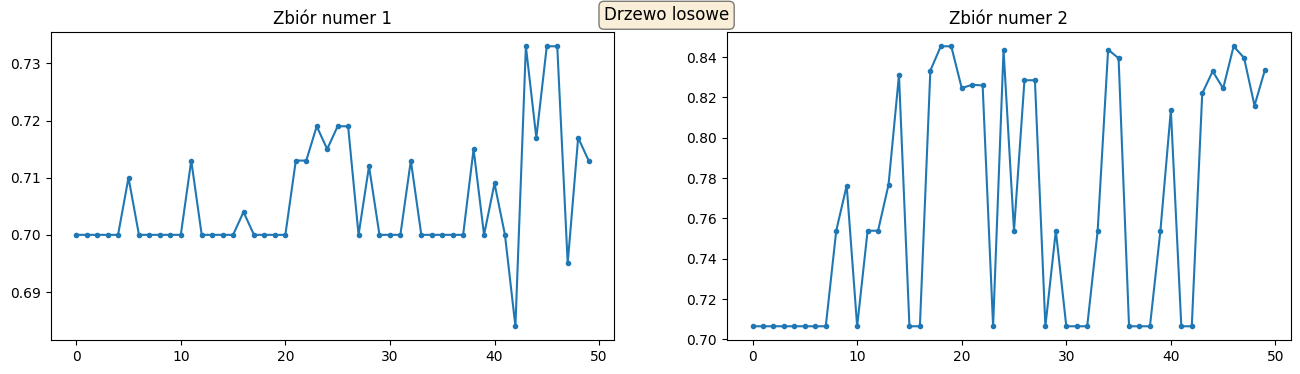

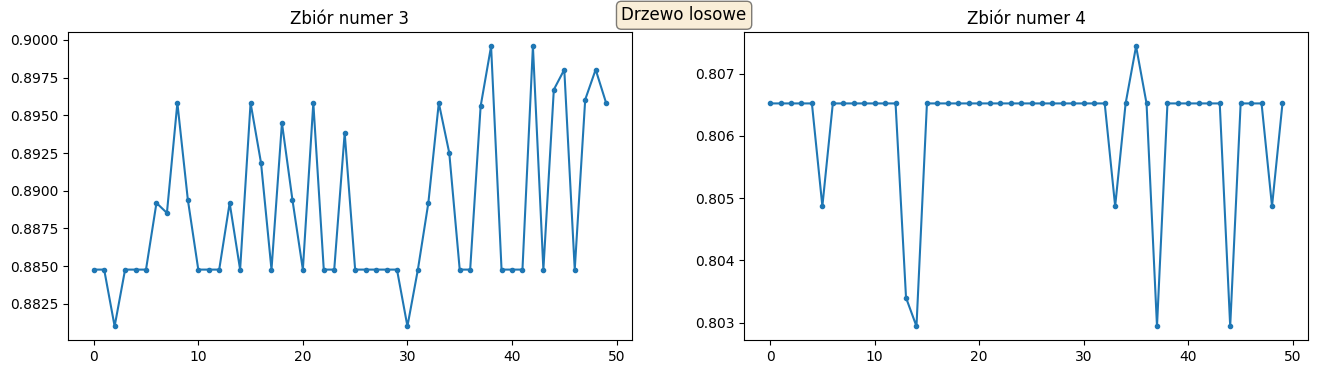

In [ ]:
plt.figure(figsize=(16, 4))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.suptitle("Drzewo losowe", bbox=props, verticalalignment='top', x=0.51, y=0.945)

plt.subplot(1, 2, 1)
results_bayes_tree[f'wynik_zbior_{1}'].plot(title=f'Zbiór numer {1}', style='.-')
plt.subplot(1, 2, 2)
results_bayes_tree[f'wynik_zbior_{2}'].plot(title=f'Zbiór numer {2}', style='.-')
plt.savefig('plots/convergance_tree_1_2', bbox_inches="tight",)
plt.show()

plt.figure(figsize=(16, 4))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.suptitle("Drzewo losowe", bbox=props, verticalalignment='top', x=0.51, y=0.945)

plt.subplot(1, 2, 1)
results_bayes_tree[f'wynik_zbior_{3}'].plot(title=f'Zbiór numer {3}', style='.-')
plt.subplot(1, 2, 2)
results_bayes_tree[f'wynik_zbior_{4}'].plot(title=f'Zbiór numer {4}', style='.-')

plt.savefig('plots/convergance_tree_3_4', bbox_inches="tight")
plt.show()

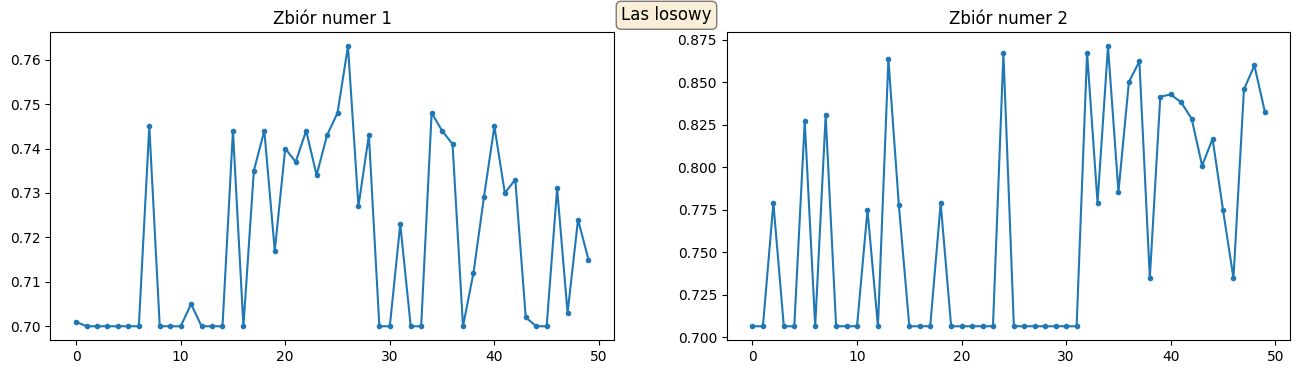

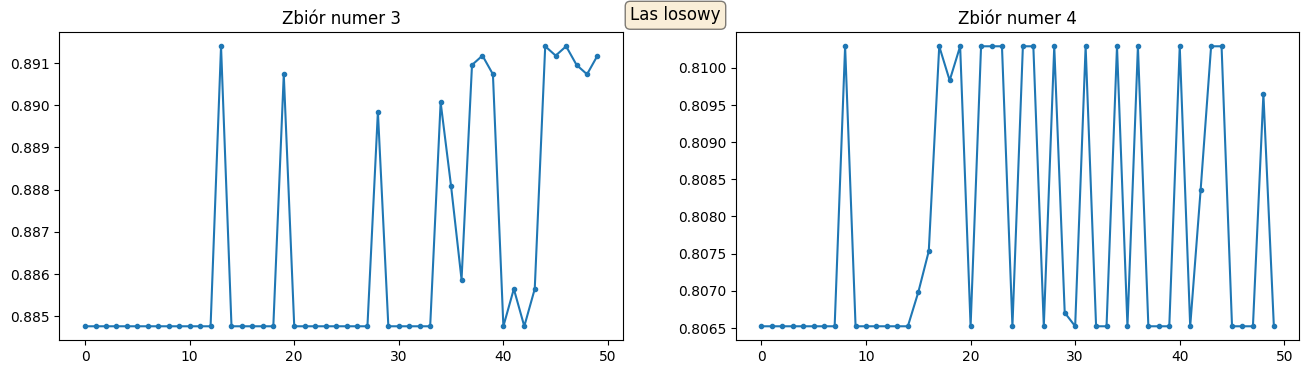

In [ ]:
plt.figure(figsize=(16, 4))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.suptitle("Las losowy", bbox=props, verticalalignment='top', x=0.51, y=0.945)

plt.subplot(1, 2, 1)
results_bayes_forest[f'wynik_zbior_{1}'].plot(title=f'Zbiór numer {1}', style='.-')
plt.subplot(1, 2, 2)
results_bayes_forest[f'wynik_zbior_{2}'].plot(title=f'Zbiór numer {2}', style='.-')
plt.savefig('plots/convergance_forest_1_2', bbox_inches="tight",)
plt.show()

plt.figure(figsize=(16, 4))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.suptitle("Las losowy", bbox=props, verticalalignment='top', x=0.51, y=0.945)

plt.subplot(1, 2, 1)
results_bayes_forest[f'wynik_zbior_{3}'].plot(title=f'Zbiór numer {3}', style='.-')
plt.subplot(1, 2, 2)
results_bayes_forest[f'wynik_zbior_{4}'].plot(title=f'Zbiór numer {4}', style='.-')

plt.savefig('plots/convergance_forest_3_4', bbox_inches="tight")
plt.show()

In [ ]:
lr = pd.read_csv('models_results/Regression.csv')
tree = pd.read_csv('models_results/Decision_tree.csv')
forest = pd.read_csv('models_results/Random_forest.csv')

In [ ]:
results_bayes_lr['mean_result'] = (results_bayes_lr['wynik_zbior_1'] + results_bayes_lr['wynik_zbior_2']  + results_bayes_lr['wynik_zbior_3']  + results_bayes_lr['wynik_zbior_4'])/4
results_bayes_tree['mean_result'] = (results_bayes_tree['wynik_zbior_1'] + results_bayes_tree['wynik_zbior_2']  + results_bayes_tree['wynik_zbior_3']  + results_bayes_tree['wynik_zbior_4'])/4
results_bayes_forest['mean_result'] = (results_bayes_forest['wynik_zbior_1'] + results_bayes_forest['wynik_zbior_2']  + results_bayes_forest['wynik_zbior_3']  + results_bayes_forest['wynik_zbior_4'])/4

In [ ]:
from scipy.stats import ranksums

p_lr = ranksums(results_bayes_lr['mean_result'], lr['mean_result']).pvalue
p_tree = ranksums(results_bayes_tree['mean_result'], tree['mean_result']).pvalue
p_forest = ranksums(results_bayes_forest['mean_result'], forest['mean_result']).pvalue
print(f"Log Reg: is random like bayes? pvalue for Wilcoxon ranksums text: {p_lr}")
print(f"Tree: is random like bayes? pvalue for Wilcoxon ranksums text: {p_tree}")
print(f"Forest: is random like bayes? pvalue for Wilcoxon ranksums text: {p_forest}")

Log Reg: is random like bayes? pvalue for Wilcoxon ranksums text: 0.344938043721714
Tree: is random like bayes? pvalue for Wilcoxon ranksums text: 0.004913074484542433
Forest: is random like bayes? pvalue for Wilcoxon ranksums text: 0.010128977972710446


In [ ]:
from scipy.stats import ansari

p_a_lr = ansari(results_bayes_lr['mean_result'], lr['mean_result'], alternative='greater').pvalue
p_a_tree = ansari(results_bayes_tree['mean_result'], tree['mean_result'], alternative='greater').pvalue
p_a_forest = ansari(results_bayes_forest['mean_result'], forest['mean_result'], alternative='greater').pvalue
print(f"Log Reg: is random like bayes? pvalue for Wilcoxon ranksums text: {p_a_lr}")
print(f"Tree: is random like bayes? pvalue for Wilcoxon ranksums text: {p_a_tree}")
print(f"Forest: is random like bayes? pvalue for Wilcoxon ranksums text: {p_a_forest}")

Log Reg: is random like bayes? pvalue for Wilcoxon ranksums text: 0.7468975223686175
Tree: is random like bayes? pvalue for Wilcoxon ranksums text: 0.6344575906671944
Forest: is random like bayes? pvalue for Wilcoxon ranksums text: 0.9973043498389526


C:\Users\macie\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_morestats.py:2443: UserWarning: Ties preclude use of exact statistic.
  warnings.warn("Ties preclude use of exact statistic.")
